# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

def reinit():
    global X_train, y_train, X_valid, y_valid, X_test, y_test
    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

print(X_train[4].shape)

(32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
# import the sign description CSV for ease of debugging
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

class_num = 0
print(name_values[class_num][1])

b'Speed limit (20km/h)'


In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

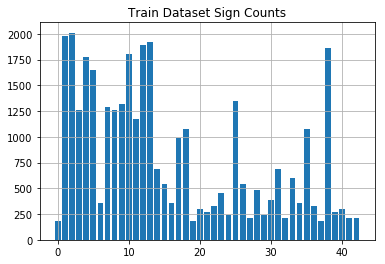

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


In [5]:
# show dataset counts
def show_counts(dataset_array):
    unique_train, counts_train = np.unique(dataset_array, return_counts=True)
    plt.bar(unique_train, counts_train)
    plt.grid()
    plt.title("Train Dataset Sign Counts")
    plt.show()
    print(counts_train)
    return counts_train
    
train_counts = show_counts(y_train)

(32, 32, 3)
(32, 32, 3)


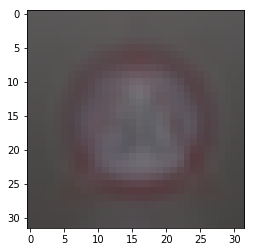

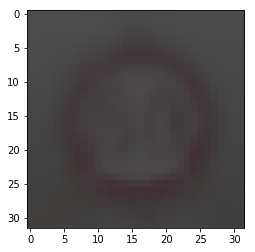

In [6]:
## the mean image
mean_img = np.mean(X_train, axis=0).astype(np.uint8)
print(mean_img.shape)


## std dev image
std_img = np.std(X_train, axis=0).astype(np.uint8)
print(std_img.shape)

plt.imshow(mean_img)
plt.show()

plt.imshow(std_img)
plt.show()

<p>The <b>mean</b> image is the image produced by calculating the "mean pixel" for every pixel in the training data set. Pixel (0,0) of this image is calculated by averaging the (0, 0) pixel of all the images in the training set.</p>

<p>It's obvious from looking at the mean image that the data is not well distributed, because the average image seems to be a circular traffic sign with a red border and a two-digit number in the middle, with the first digit being a number with a curve (looks like a 5 or a 9) and the second digit resembling a 0. </p>

<p>The <b>standard deviation</b> image shows the standard deviation at each pixel (the highest variance pixels will show whiter). It's strange to see that there's low variance at the borders of the image and high variance at the center.</p>

<p> This data is going to need to be <b>augmented</b> to provide more data samples for a robust model and a good distribution over the output classes so that the model is <b>unbiased</b>.</p>

### Personal Experimentation


23


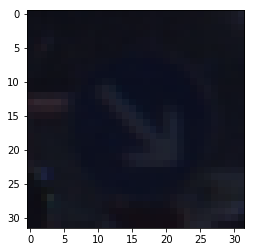

In [7]:
ex_num = 1900

print(y_train[ex_num])
img1 = X_valid[ex_num]
plt.imshow(img1)
plt.show()


In [8]:
from random import randint
import skimage.transform
import cv2

## Dataset Augmentation

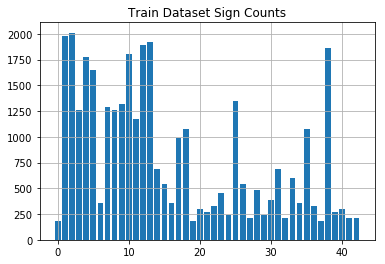

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


In [9]:
reinit() # debugging, reset the arrays to their imported values
train_counts = show_counts(y_train)

### Augmentations

<p> Since each augmentation occurs on the whole set, the most important/common augmentation should go first, in order for it to be compounded. The order below is what I believe to be the order of greatest variance to least of traffic signs in the real world. </p>
<ol style="font-size:1.2em">
    <li>Brightness</li>
    <li>Scaling</li>
    <li>Transformations</li>
    <li>Rotations</li>
</ol>

20284


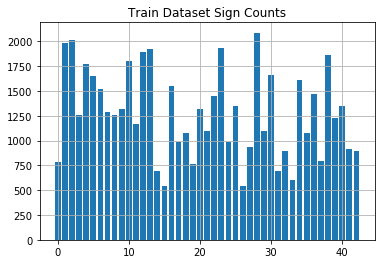

[ 786 1980 2010 1260 1770 1650 1522 1290 1260 1320 1800 1170 1890 1920  690
  540 1550  990 1080  762 1320 1094 1452 1938  984 1350  540  940 2088 1096
 1658  690  896  599 1616 1080 1466  794 1860 1228 1348  914  892]
3316


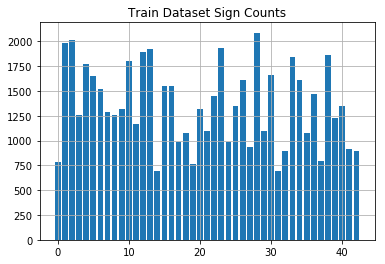

[ 786 1980 2010 1260 1770 1650 1522 1290 1260 1320 1800 1170 1890 1920  690
 1546 1550  990 1080  762 1320 1094 1452 1938  984 1350 1608  940 2088 1096
 1658  690  896 1841 1616 1080 1466  794 1860 1228 1348  914  892]


In [10]:
# brightness

X_train_bri = []
y_train_bri = []

for i in range(len(X_train)):
    if train_counts[y_train[i]] < 500:
        for j in [20, 40, 60, 80, 100]:
            if randint(0, 2) > 0:
                continue
            X_train_bri.append(cv2.add(X_train[i], j))
            y_train_bri.append(y_train[i])
            X_train_bri.append(cv2.subtract(X_train[i], j))
            y_train_bri.append(y_train[i])
            
print(len(X_train_bri))

X_train = np.concatenate([X_train, X_train_bri])
y_train = np.concatenate([y_train, y_train_bri])

train_counts = show_counts(y_train)

X_train_bri = []
y_train_bri = []

for i in range(len(X_train)):
    if train_counts[y_train[i]] < 600:
        for j in [20, 40, 60, 80, 100]:
            if randint(0, 4) > 0:
                continue
            X_train_bri.append(cv2.add(X_train[i], j))
            y_train_bri.append(y_train[i])
            X_train_bri.append(cv2.subtract(X_train[i], j))
            y_train_bri.append(y_train[i])
            
print(len(X_train_bri))

X_train = np.concatenate([X_train, X_train_bri])
y_train = np.concatenate([y_train, y_train_bri])

train_counts = show_counts(y_train)

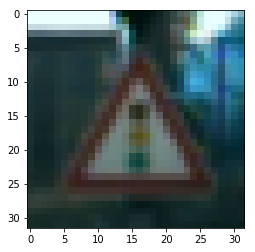

In [11]:
plt.imshow(X_train_bri[17])
plt.show()

9324


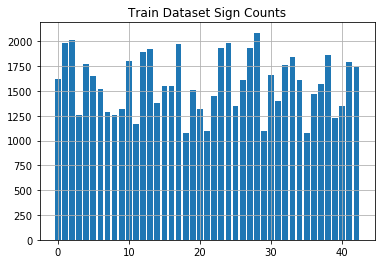

[1617 1980 2010 1260 1770 1650 1522 1290 1260 1320 1800 1170 1890 1920 1380
 1546 1550 1972 1080 1514 1320 1094 1452 1938 1986 1350 1608 1937 2088 1096
 1658 1398 1763 1841 1616 1080 1466 1567 1860 1228 1348 1790 1738]


In [12]:
# scaling

X_train_sc = []
y_train_sc = []

for i in range(len(X_train)):
    if train_counts[y_train[i]] < 1000:
        for j in [-30, -20, -10, -5, -2, 2, 4, 6]:
            if randint(0, 7) > 0:
                continue
            
            img = X_train[i]
            rows,cols,depth = img.shape

            # ending locations
            pts1 = np.float32([[j,j],[rows-j,j],[j,cols-j],[rows-j,cols-j]])

            # starting locations (4 corners)
            pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

            M = cv2.getPerspectiveTransform(pts1,pts2)

            res = cv2.warpPerspective(img,M,(rows,cols))
            X_train_sc.append(res)
            y_train_sc.append(y_train[i])

            
print(len(X_train_sc))

X_train = np.concatenate([X_train, X_train_sc])
y_train = np.concatenate([y_train, y_train_sc])

train_counts = show_counts(y_train)

7286


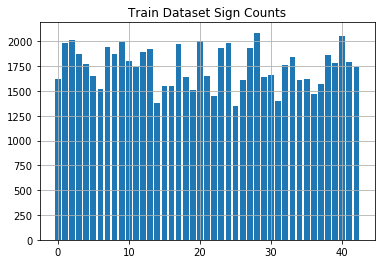

[1617 1980 2010 1876 1770 1650 1522 1948 1875 1991 1800 1741 1890 1920 1380
 1546 1550 1972 1639 1514 2002 1650 1452 1938 1986 1350 1608 1937 2088 1646
 1658 1398 1763 1841 1616 1626 1466 1567 1860 1785 2053 1790 1738]


In [13]:
# rotations

X_train_rot = []
y_train_rot = []

for i in range(len(X_train)):
    if train_counts[y_train[i]] < 1350:
        for j in [-15, -10, 10, 15]:
            if randint(0, 7) > 0:
                continue
            X_train_rot.append(skimage.transform.rotate(X_train[i], j))
            y_train_rot.append(y_train[i])
            
print(len(X_train_rot))

X_train = np.concatenate([X_train, X_train_rot])
y_train = np.concatenate([y_train, y_train_rot])

train_counts = show_counts(y_train)

15580
90589


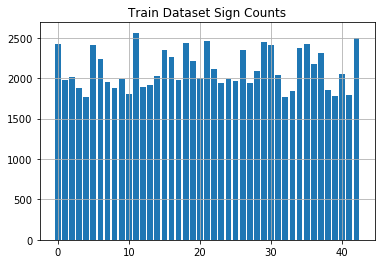

[2426 1980 2010 1876 1770 2416 2240 1948 1875 1991 1800 2563 1890 1920 2028
 2346 2264 1972 2430 2219 2002 2461 2113 1938 1986 1970 2355 1937 2088 2454
 2410 2035 1763 1841 2376 2421 2180 2311 1860 1785 2053 1790 2496]


In [14]:
#translate
X_train_trans = []
y_train_trans = []

iter_arr = X_train

for i in range(len(iter_arr)):
    if train_counts[y_train[i]] > 1750:
        continue
    for j in [-4, -2, 0, 2, 4]:
        for k in [0, 4, -2, -4, 2]:
            if j == 0 and k == 0:
                continue
            if randint(0, 50) > 0:
                continue
            img = iter_arr[i]
            rows, cols, depth = img.shape
            #use a transformation matrix
            M = np.float32([[1,0,j],[0,1,k]])
            dst = cv2.warpAffine(img,M,(cols,rows))
            
            X_train_trans.append(dst)
            y_train_trans.append(y_train[i])

print(len(y_train_trans))


X_train = np.concatenate([X_train, X_train_trans])
y_train = np.concatenate([y_train, y_train_trans])

print(len(y_train))

train_counts = show_counts(y_train)



<p>Sure, it's not perfect, and could be a lot better, but that distribution over classes is much better than what we had before. Now, the classifier's bias towards the classes with a greater number of images in the original training set will be far less than it was.</p>

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### Pre-proccessing Pipeline

1. Grayscale the data set
2. Use mean normalization to achieve zero mean and low variance

In [16]:
#grayscale - using pixel mean
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True) 
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

#get the mean for the grayscale data set to use in normalization
train_mean = np.mean(X_train_gray).astype(int)

#std dev for debugging
train_std = np.std(X_train_gray).astype(int)

print(train_mean)
print(train_std)

#train_mean = 128 # try the suggested 128

X_train_norm = (X_train_gray - train_mean)/train_mean
X_valid_norm = (X_valid_gray - train_mean)/train_mean
X_test_norm = (X_test_gray - train_mean)/train_mean

train_norm_mean = np.mean(X_train_norm).astype(float)
train_norm_std = np.std(X_train_norm).astype(float)

print()
print(train_norm_mean)
print(train_norm_std)

71
67

0.00433346138139
0.944216347335


In [17]:

#debug
print(X_train_gray.shape)
print(X_train_norm.shape)
print(X_valid_norm.shape)
print(X_test_norm.shape)

(90589, 32, 32, 1)
(90589, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


### Model Architecture

<p> For this model, I plan on using the LeNet architecture. </p>

<img src="lenet.png">

In [18]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def TrafficSignLeNet(x, mu=0, sigma= 0.1):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Modified LeNet Model Architecture
<i>adapted from Sermanet/LeCunn traffic sign classification journal article</i>

<img src="mod-lenet.jpg"/>

In [19]:
from tensorflow.contrib.layers import l2_regularizer

#made global for the layer weight visualization step
conv1 = None
conv2 = None
conv3 = None
fc4 = None

def ModifiedLeNet(x, mu = 0, sigma = 0.1):
    global conv1
    global conv2
    global conv3
    global fc4
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, conv1_b)
    print("conv1 shape: ", conv1.get_shape())

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, conv2_b)
                     
    # Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID')
    conv3 = tf.nn.bias_add(conv3, conv3_b)
                     
    # Activation.
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, keep_prob)

    # Flatten conv2. Input = 5x5x16. Output = 400.
    conv2_flat = flatten(conv2)
    
    # Flatten conv3. Input = 1x1x400. Output = 400.
    conv3_flat = flatten(conv3)
    
    # Combine conv2 and conv3 flat. Input = 400 + 400. Output = 800
    fc0 = tf.concat_v2([conv2_flat, conv3_flat], 1)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    fc4_W = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(43))    
    fc4 = tf.add(tf.matmul(fc0, fc4_W), fc4_b)
    
    weights = [conv1_W, conv2_W, conv3_W, fc4_W]

    return fc4, weights

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

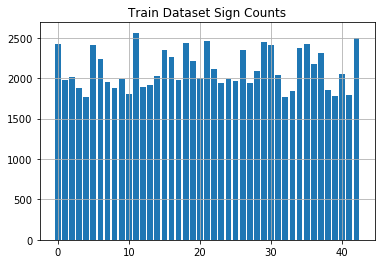

[2426 1980 2010 1876 1770 2416 2240 1948 1875 1991 1800 2563 1890 1920 2028
 2346 2264 1972 2430 2219 2002 2461 2113 1938 1986 1970 2355 1937 2088 2454
 2410 2035 1763 1841 2376 2421 2180 2311 1860 1785 2053 1790 2496]


array([2426, 1980, 2010, 1876, 1770, 2416, 2240, 1948, 1875, 1991, 1800,
       2563, 1890, 1920, 2028, 2346, 2264, 1972, 2430, 2219, 2002, 2461,
       2113, 1938, 1986, 1970, 2355, 1937, 2088, 2454, 2410, 2035, 1763,
       1841, 2376, 2421, 2180, 2311, 1860, 1785, 2053, 1790, 2496])

In [21]:
show_counts(y_train)

In [22]:
BATCH_SIZE = 128
EPOCHS = 60

rate = 0.0009
reg_constant = 1e-5

In [23]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

logits, weights = ModifiedLeNet(x)

# L2 Regularization 
regularizers = 0.0
for w in weights:
    regularizers += tf.nn.l2_loss(w)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + reg_constant * regularizers
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

conv1 shape:  (?, 28, 28, 6)


In [24]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [25]:
## for ease of debugging

X_train_final = X_train_norm
y_train_final = y_train


X_valid_final = X_valid_norm




In [26]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_final)
    
    print("Training...")
    print()
    validation_accuracy_figure = []
    test_accuracy_figure = []
    
    for i in range(EPOCHS):
        X_train_final, y_train_final = shuffle(X_train_final, y_train_final)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_final[offset:end], y_train_final[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid_final, y_valid)
        validation_accuracy_figure.append(100 * validation_accuracy)
        

        print("EPOCH {} ...".format(i+1))
        #print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './mod-lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.810

EPOCH 2 ...
Validation Accuracy = 0.874

EPOCH 3 ...
Validation Accuracy = 0.893

EPOCH 4 ...
Validation Accuracy = 0.907

EPOCH 5 ...
Validation Accuracy = 0.931

EPOCH 6 ...
Validation Accuracy = 0.937

EPOCH 7 ...
Validation Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.943

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Accuracy = 0.938

EPOCH 12 ...
Validation Accuracy = 0.950

EPOCH 13 ...
Validation Accuracy = 0.954

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.953

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.961

EPOCH 18 ...
Validation Accuracy = 0.957

EPOCH 19 ...
Validation Accuracy = 0.961

EPOCH 20 ...
Validation Accuracy = 0.961

EPOCH 21 ...
Validation Accuracy = 0.961

EPOCH 22 ...
Validation Accuracy = 0.959

EPOCH 23 ...
Validation Accuracy = 0.966

EPOCH 24 ...
Validation Accura

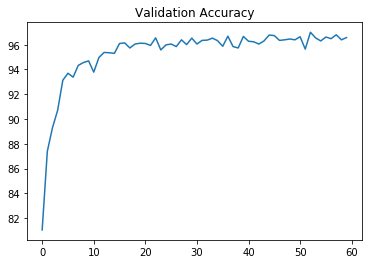

In [27]:
plt.plot(validation_accuracy_figure)
plt.title("Validation Accuracy")
plt.show()

In [28]:
with tf.Session() as sess:
    saver2 = tf.train.import_meta_graph('./mod-lenet.meta')
    saver2.restore(sess, "./mod-lenet")
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)


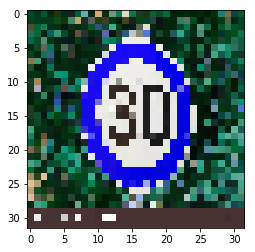

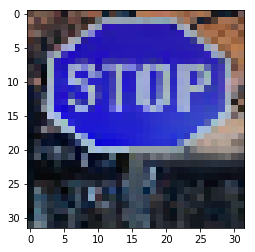

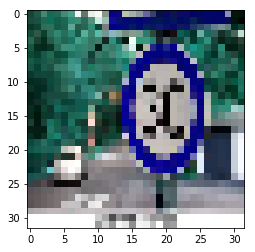

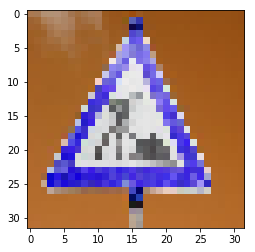

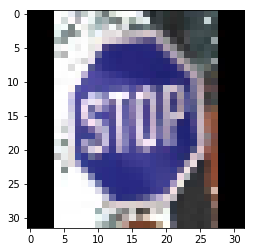

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
german_five = []
german_five.append(cv2.resize(cv2.imread("german1.jpg"), (32, 32)))
german_five.append(cv2.resize(cv2.imread("german2.jpg"), (32, 32)))
german_five.append(cv2.resize(cv2.imread("german3.jpg"), (32, 32)))
german_five.append(cv2.resize(cv2.imread("german4.jpg"), (32, 32)))
german_five.append(cv2.resize(cv2.imread("german5.jpg"), (32, 32)))
german_five = np.array(german_five)
print(german_five[0].shape)

for i in range(5):
    fig, ax = plt.subplots()
    ax.imshow(german_five[i])
plt.show()

### Predict the Sign Type for Each Image

(5, 32, 32, 3)
(5, 32, 32, 1)


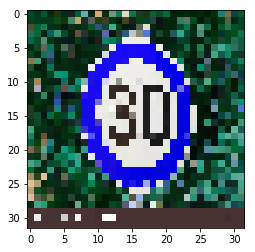

Prediction:  b'Stop'


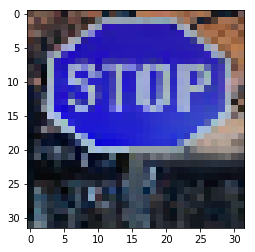

Prediction:  b'Stop'


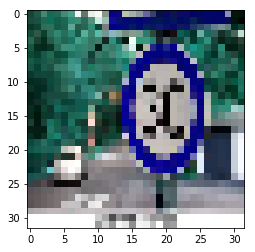

Prediction:  b'Stop'


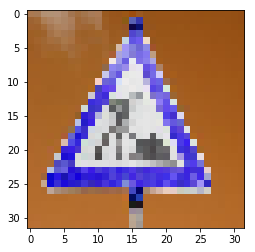

Prediction:  b'Road work'


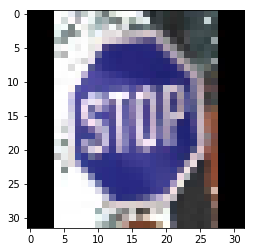

Prediction:  b'Stop'


In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print(german_five.shape)
german_five_gray = np.sum(german_five/3, axis=3, keepdims=True)
german_five_norm = german_five_gray/train_mean - 1
print(german_five_gray.shape)

softmax_logits = tf.nn.softmax(logits)


top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    saver3 = tf.train.import_meta_graph('./mod-lenet.meta')
    saver3.restore(sess, "./mod-lenet")
    sfl = sess.run(softmax_logits, feed_dict={x: german_five_norm, keep_prob: 1.0})
    topk = sess.run(top_k, feed_dict={x: german_five_norm, keep_prob: 1.0})
    
    for i in range(5):
        img = german_five[i]
        plt.imshow(img)
        plt.show()
        print("Prediction: ", name_values[topk[1][i][0]][1])


### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
my_labels = [1, 14, 1, 25, 14]


with tf.Session() as sess:
    saver4 = tf.train.import_meta_graph('./mod-lenet.meta')
    saver4.restore(sess, "./mod-lenet")
    my_accuracy = evaluate(german_five_norm, my_labels)
    print("German Five Set Accuracy = {:.3f}".format(my_accuracy))

German Five Set Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

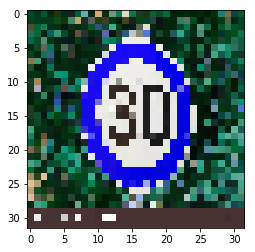

Top 5: 
b'Stop'  -  0.672421
b'Speed limit (20km/h)'  -  0.267674
b'Speed limit (80km/h)'  -  0.0383707


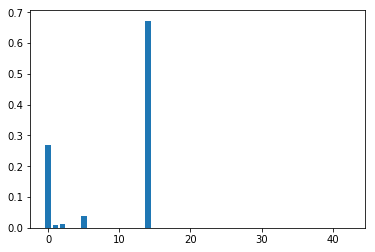

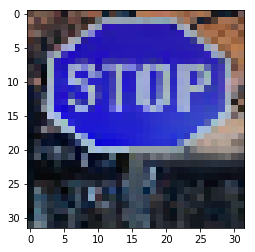

Top 5: 
b'Stop'  -  0.872899
b'Speed limit (20km/h)'  -  0.0454002
b'Speed limit (80km/h)'  -  0.0398391


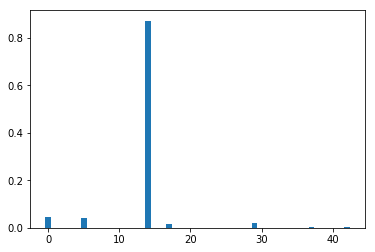

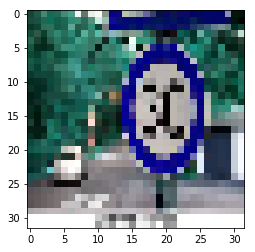

Top 5: 
b'Stop'  -  0.542472
b'Speed limit (20km/h)'  -  0.40858
b'Bicycles crossing'  -  0.0194352


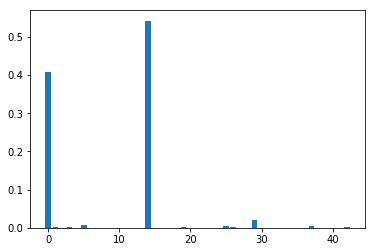

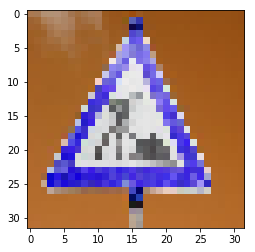

Top 5: 
b'Road work'  -  0.410761
b'Bicycles crossing'  -  0.357572
b'Road narrows on the right'  -  0.185167


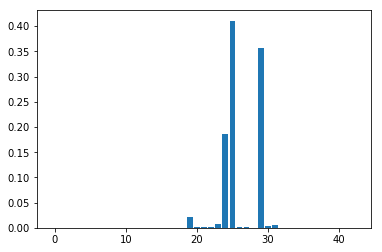

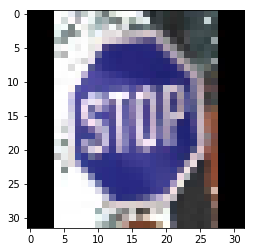

Top 5: 
b'Stop'  -  1.0
b'Speed limit (20km/h)'  -  9.22631e-08
b'Speed limit (80km/h)'  -  3.52219e-09


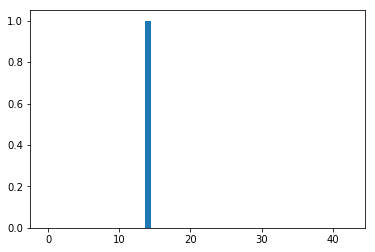

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver5 = tf.train.import_meta_graph('./mod-lenet.meta')
    saver5.restore(sess, "./mod-lenet")
    sfl = sess.run(softmax_logits, feed_dict={x: german_five_norm, keep_prob: 1.0})
    topk = sess.run(top_k, feed_dict={x: german_five_norm, keep_prob: 1.0})
    
    for i in range(5):
        img = german_five[i]
        plt.imshow(img)
        plt.show()
        print("Top 5: ")
        print(name_values[topk[1][i][0]][1], " - ", topk[0][i][0])
        print(name_values[topk[1][i][1]][1], " - ", topk[0][i][1])
        print(name_values[topk[1][i][2]][1], " - ", topk[0][i][2])
        plt.bar(np.arange(n_classes), sfl[i]) 
        plt.show()
    

<i style="font-size: 1.2em"> NOTE: I just noticed that the images are blue where they should be red. This is because cv2.imread reads in BGR format. Since the images are grayscaled, it doesn't really matter for network performance, so there's no point in going back to fix it. </i>

### Calculating Precision & Recall

In [33]:
#precision & recall

true_positive = np.zeros(n_classes)
pred_positive = np.zeros(n_classes)
condition_positive = np.zeros(n_classes)

with tf.Session() as sess:
    saver6 = tf.train.import_meta_graph('./mod-lenet.meta')
    saver6.restore(sess, "./mod-lenet")
    pred = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test_norm, keep_prob: 1.0})
    print(pred)
    print(y_test)
    for i in pred:
        pred_positive[int(i)] += 1
    for i in y_test:
        condition_positive[int(i)] += 1
    for i in range(len(pred)):
        if pred[i] == y_test[i]:
            true_positive[pred[i]] += 1
            
    for i in range(n_classes):
        print("CLASS:", i, ", ", name_values[i][1])
        print("    PRECISION: {:.2f}%".format(100 *float(true_positive[i])/int(pred_positive[i])))
        print("    RECALL: {:.2f}%".format(100 * float(true_positive[i])/int(condition_positive[i])))



[16  1 38 ..., 42  7 10]
[16  1 38 ...,  6  7 10]
CLASS: 0 ,  b'Speed limit (20km/h)'
    PRECISION: 89.23%
    RECALL: 96.67%
CLASS: 1 ,  b'Speed limit (30km/h)'
    PRECISION: 97.75%
    RECALL: 96.39%
CLASS: 2 ,  b'Speed limit (50km/h)'
    PRECISION: 96.98%
    RECALL: 94.13%
CLASS: 3 ,  b'Speed limit (60km/h)'
    PRECISION: 95.40%
    RECALL: 92.22%
CLASS: 4 ,  b'Speed limit (70km/h)'
    PRECISION: 98.39%
    RECALL: 92.88%
CLASS: 5 ,  b'Speed limit (80km/h)'
    PRECISION: 82.05%
    RECALL: 95.08%
CLASS: 6 ,  b'End of speed limit (80km/h)'
    PRECISION: 98.36%
    RECALL: 80.00%
CLASS: 7 ,  b'Speed limit (100km/h)'
    PRECISION: 98.46%
    RECALL: 85.33%
CLASS: 8 ,  b'Speed limit (120km/h)'
    PRECISION: 91.72%
    RECALL: 96.00%
CLASS: 9 ,  b'No passing'
    PRECISION: 99.79%
    RECALL: 99.58%
CLASS: 10 ,  b'No passing for vehicles over 3.5 metric tons'
    PRECISION: 100.00%
    RECALL: 98.79%
CLASS: 11 ,  b'Right-of-way at the next intersection'
    PRECISION: 89.19%
  

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


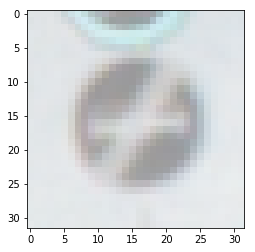

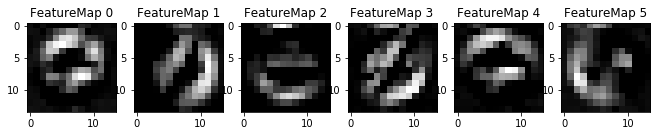

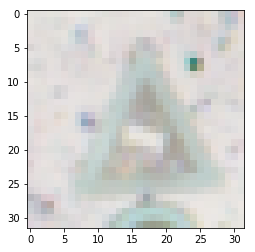

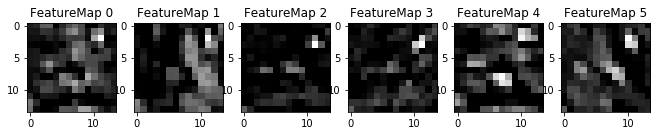

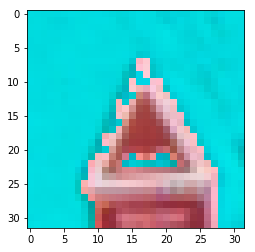

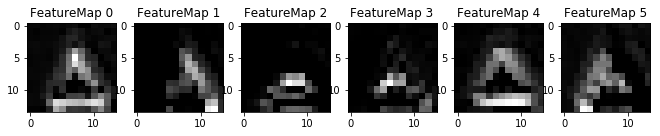

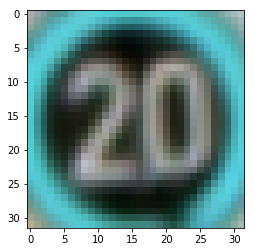

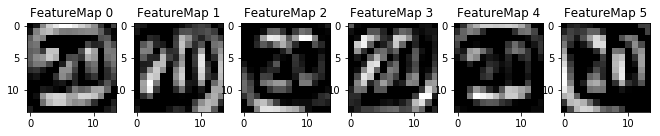

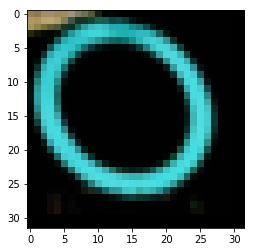

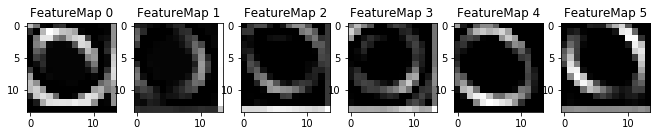

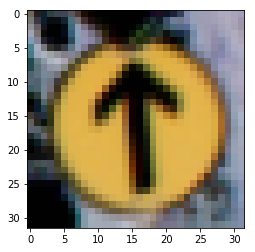

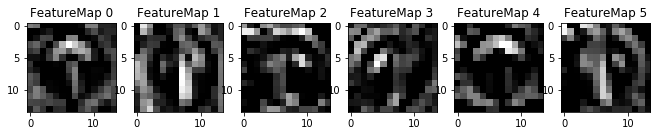

In [39]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : np.array([image_input])})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            


with tf.Session() as sess:
    saver7 = tf.train.import_meta_graph('./mod-lenet.meta')
    saver7.restore(sess, "./mod-lenet")
    
    for (image_index, i) in [(10, 1), (1999, 2), (40000, 3), (60000, 4), (80000, 5), (20000, 6)]:
        image1 = X_train[image_index]
        image1Norm = X_train_norm[image_index]
        plt.imshow(image1)
        plt.show()
        outputFeatureMap(image1Norm, conv1, plt_num=i)
        plt.show()